# Import

In [128]:
# 데이터프레임 및 시각화
import pandas as pd # 시각화
import numpy as np # 집계
import seaborn as sns # 시각화
import matplotlib.pyplot as plt # 시각화
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='whitegrid') # 한글 폰트, 마이너스 부호 깨짐 방지, 스타일 지정

# 웹 크롤링
import requests # url 요청
from bs4 import BeautifulSoup # response 객체 생성

# 자연어 처리
from konlpy.tag import Okt # 형태소 분석, 윈도우에서 지원되지 않는 Mecab을 제외한 제일 빠른 사전 사용
from wordcloud import WordCloud # 워드클라우드 생성
import re # 정규표현식

# 기타
from tqdm import tqdm # 반복문 진행 상황 확인
from collections import Counter # 리스트 원소 개수 세기
import warnings # warning 메세지 관련
warnings.filterwarnings(action='ignore') # warning 메세지 생략
%config InlineBackend.figure_format = 'retina' # 고화질

# Web Crawling
- FC 온라인 Inven -> FCO 인벤 통합검색 -> 게시판 -> "매칭" 검색 -> 최신순으로 1000개 게시물까지 크롤링(22.12.07 ~ 23.10.17)
- https://www.inven.co.kr/search/fifaonline4

In [2]:
# 추출한 게시물 이름, 링크, 내용 담아놓을 dataframe
df_result = pd.DataFrame(columns=["board_name","link","content"])

col_name, col_link, col_content = [],[],[]

# 총 50페이지 방문
for i in tqdm(range(1,51)):
    print(f'{i}번째 페이지 크롤링 시작')
    # FC 온라인 인벤 게시판 통합 "매칭" 최신 순 검색 후
    url = f'https://www.inven.co.kr/search/fifaonline4/article/%EB%A7%A4%EC%B9%AD/{i}?sort=recency'

    # get 방식으로 response 요청, header 조건 없이 크롤링 가능
    response_preview = requests.get(url)
    
    # 비정상접근 시 오류 메세지 출력 후 다음 페이지로 넘어가기
    if response_preview.status_code != 200 :
        print(f'{i}번째 페이지에서 response = {response_preview.status_code}')
        continue

    # 페이지 soup 객체 생성
    result_preview = BeautifulSoup(response_preview.text, 'html.parser')

    # 한 페이지 내의 20개 게시물별로 크롤링
    for j in range(1,21):
        # 크롤링 진행 상황 확인
        if not j%10 :
            print(f'{i}번째 페이지 크롤링 {50*(j//10)}% 완료')

        # 게시물 링크, 이름 추출
        raw_preview = result_preview.select(f'#fifaonline4Body>div.commu-wrap>section>article>section.commu-center>div.commu-body.pcMain>div>div.isearch_sub_wrap>div.section_box.noboard>div.section_body>ul>li:nth-child({j})>h1>a')
        board_name = raw_preview[0].text
        board_link = raw_preview[0].get('href')

        # 게시물 링크로 들어가서 게시물 내용 추출
        response_content = requests.get(board_link)

        # 비정상 접근 시 오류 메세지 출력 후 다음 게시물로 넘어가기
        if response_content.status_code != 200 :
            print(f'{j}번째 게시물에서 response = {response_content.status_code}')
            continue
        
        # 게시물 soup 객체 생성
        result_content = BeautifulSoup(response_content.text, 'html.parser')

        # 게시물 내용 추출
        board_content = result_content.select('#powerbbsContent')[0].get_text()

        # 추출 결과 저장
        col_name.append(board_name)
        col_link.append(board_link)
        col_content.append(board_content)

# 저장된 내용 DataFrame에 넣기
df_result["board_name"] = col_name
df_result["link"] = col_link
df_result["content"] = col_content

  0%|          | 0/50 [00:00<?, ?it/s]

1번째 페이지 크롤링 시작
1번째 페이지 크롤링 50% 완료
1번째 페이지 크롤링 100% 완료


  2%|▏         | 1/50 [00:26<21:26, 26.26s/it]

2번째 페이지 크롤링 시작
2번째 페이지 크롤링 50% 완료
2번째 페이지 크롤링 100% 완료


  4%|▍         | 2/50 [01:00<24:35, 30.74s/it]

3번째 페이지 크롤링 시작
3번째 페이지 크롤링 50% 완료
3번째 페이지 크롤링 100% 완료


  6%|▌         | 3/50 [01:24<21:52, 27.94s/it]

4번째 페이지 크롤링 시작
4번째 페이지 크롤링 50% 완료
4번째 페이지 크롤링 100% 완료


  8%|▊         | 4/50 [01:45<19:11, 25.03s/it]

5번째 페이지 크롤링 시작
5번째 페이지 크롤링 50% 완료
5번째 페이지 크롤링 100% 완료


 10%|█         | 5/50 [02:11<19:07, 25.50s/it]

6번째 페이지 크롤링 시작
6번째 페이지 크롤링 50% 완료
6번째 페이지 크롤링 100% 완료


 12%|█▏        | 6/50 [02:33<17:49, 24.30s/it]

7번째 페이지 크롤링 시작
7번째 페이지 크롤링 50% 완료
7번째 페이지 크롤링 100% 완료


 14%|█▍        | 7/50 [02:54<16:34, 23.12s/it]

8번째 페이지 크롤링 시작
8번째 페이지 크롤링 50% 완료
8번째 페이지 크롤링 100% 완료


 16%|█▌        | 8/50 [03:18<16:24, 23.43s/it]

9번째 페이지 크롤링 시작
9번째 페이지 크롤링 50% 완료
9번째 페이지 크롤링 100% 완료


 18%|█▊        | 9/50 [03:38<15:16, 22.35s/it]

10번째 페이지 크롤링 시작
10번째 페이지 크롤링 50% 완료
10번째 페이지 크롤링 100% 완료


 20%|██        | 10/50 [03:59<14:43, 22.08s/it]

11번째 페이지 크롤링 시작
11번째 페이지 크롤링 50% 완료
11번째 페이지 크롤링 100% 완료


 22%|██▏       | 11/50 [04:21<14:14, 21.90s/it]

12번째 페이지 크롤링 시작
12번째 페이지 크롤링 50% 완료
12번째 페이지 크롤링 100% 완료


 24%|██▍       | 12/50 [04:43<13:56, 22.02s/it]

13번째 페이지 크롤링 시작
13번째 페이지 크롤링 50% 완료
13번째 페이지 크롤링 100% 완료


 26%|██▌       | 13/50 [05:07<13:54, 22.54s/it]

14번째 페이지 크롤링 시작
14번째 페이지 크롤링 50% 완료
14번째 페이지 크롤링 100% 완료


 28%|██▊       | 14/50 [05:34<14:22, 23.97s/it]

15번째 페이지 크롤링 시작
15번째 페이지 크롤링 50% 완료
15번째 페이지 크롤링 100% 완료


 30%|███       | 15/50 [05:59<14:10, 24.29s/it]

16번째 페이지 크롤링 시작
16번째 페이지 크롤링 50% 완료
16번째 페이지 크롤링 100% 완료


 32%|███▏      | 16/50 [06:23<13:43, 24.22s/it]

17번째 페이지 크롤링 시작
7번째 게시물에서 response = 404
17번째 페이지 크롤링 50% 완료
11번째 게시물에서 response = 404
17번째 페이지 크롤링 100% 완료


 34%|███▍      | 17/50 [06:45<12:57, 23.55s/it]

18번째 페이지 크롤링 시작
18번째 페이지 크롤링 50% 완료
18번째 페이지 크롤링 100% 완료


 36%|███▌      | 18/50 [07:09<12:31, 23.49s/it]

19번째 페이지 크롤링 시작
19번째 페이지 크롤링 50% 완료
19번째 페이지 크롤링 100% 완료


 38%|███▊      | 19/50 [07:37<12:58, 25.12s/it]

20번째 페이지 크롤링 시작
20번째 페이지 크롤링 50% 완료
15번째 게시물에서 response = 404
20번째 페이지 크롤링 100% 완료


 40%|████      | 20/50 [07:59<12:00, 24.03s/it]

21번째 페이지 크롤링 시작
21번째 페이지 크롤링 50% 완료
21번째 페이지 크롤링 100% 완료


 42%|████▏     | 21/50 [08:24<11:41, 24.20s/it]

22번째 페이지 크롤링 시작
22번째 페이지 크롤링 50% 완료
22번째 페이지 크롤링 100% 완료


 44%|████▍     | 22/50 [08:53<12:02, 25.79s/it]

23번째 페이지 크롤링 시작
23번째 페이지 크롤링 50% 완료
23번째 페이지 크롤링 100% 완료


 46%|████▌     | 23/50 [09:16<11:15, 25.03s/it]

24번째 페이지 크롤링 시작
24번째 페이지 크롤링 50% 완료
24번째 페이지 크롤링 100% 완료


 48%|████▊     | 24/50 [09:45<11:20, 26.19s/it]

25번째 페이지 크롤링 시작
25번째 페이지 크롤링 50% 완료
25번째 페이지 크롤링 100% 완료


 50%|█████     | 25/50 [10:09<10:35, 25.42s/it]

26번째 페이지 크롤링 시작
26번째 페이지 크롤링 50% 완료
26번째 페이지 크롤링 100% 완료


 52%|█████▏    | 26/50 [10:38<10:33, 26.41s/it]

27번째 페이지 크롤링 시작
27번째 페이지 크롤링 50% 완료
27번째 페이지 크롤링 100% 완료


 54%|█████▍    | 27/50 [11:02<09:55, 25.88s/it]

28번째 페이지 크롤링 시작
28번째 페이지 크롤링 50% 완료
28번째 페이지 크롤링 100% 완료


 56%|█████▌    | 28/50 [11:25<09:08, 24.92s/it]

29번째 페이지 크롤링 시작
29번째 페이지 크롤링 50% 완료
29번째 페이지 크롤링 100% 완료


 58%|█████▊    | 29/50 [11:55<09:17, 26.55s/it]

30번째 페이지 크롤링 시작
30번째 페이지 크롤링 50% 완료
30번째 페이지 크롤링 100% 완료


 60%|██████    | 30/50 [12:24<09:04, 27.24s/it]

31번째 페이지 크롤링 시작
31번째 페이지 크롤링 50% 완료
31번째 페이지 크롤링 100% 완료


 62%|██████▏   | 31/50 [12:49<08:23, 26.50s/it]

32번째 페이지 크롤링 시작
32번째 페이지 크롤링 50% 완료
32번째 페이지 크롤링 100% 완료


 64%|██████▍   | 32/50 [13:13<07:45, 25.85s/it]

33번째 페이지 크롤링 시작
33번째 페이지 크롤링 50% 완료
33번째 페이지 크롤링 100% 완료


 66%|██████▌   | 33/50 [13:34<06:54, 24.37s/it]

34번째 페이지 크롤링 시작
34번째 페이지 크롤링 50% 완료
34번째 페이지 크롤링 100% 완료


 68%|██████▊   | 34/50 [13:58<06:25, 24.09s/it]

35번째 페이지 크롤링 시작
35번째 페이지 크롤링 50% 완료
35번째 페이지 크롤링 100% 완료


 70%|███████   | 35/50 [14:22<06:04, 24.28s/it]

36번째 페이지 크롤링 시작
36번째 페이지 크롤링 50% 완료
36번째 페이지 크롤링 100% 완료


 72%|███████▏  | 36/50 [14:43<05:26, 23.34s/it]

37번째 페이지 크롤링 시작
37번째 페이지 크롤링 50% 완료
37번째 페이지 크롤링 100% 완료


 74%|███████▍  | 37/50 [15:08<05:06, 23.61s/it]

38번째 페이지 크롤링 시작
38번째 페이지 크롤링 50% 완료
38번째 페이지 크롤링 100% 완료


 76%|███████▌  | 38/50 [15:30<04:39, 23.30s/it]

39번째 페이지 크롤링 시작
39번째 페이지 크롤링 50% 완료
39번째 페이지 크롤링 100% 완료


 78%|███████▊  | 39/50 [15:51<04:07, 22.53s/it]

40번째 페이지 크롤링 시작
40번째 페이지 크롤링 50% 완료
40번째 페이지 크롤링 100% 완료


 80%|████████  | 40/50 [16:14<03:47, 22.72s/it]

41번째 페이지 크롤링 시작
41번째 페이지 크롤링 50% 완료
41번째 페이지 크롤링 100% 완료


 82%|████████▏ | 41/50 [16:38<03:26, 22.93s/it]

42번째 페이지 크롤링 시작
42번째 페이지 크롤링 50% 완료
42번째 페이지 크롤링 100% 완료


 84%|████████▍ | 42/50 [16:58<02:58, 22.31s/it]

43번째 페이지 크롤링 시작
43번째 페이지 크롤링 50% 완료
43번째 페이지 크롤링 100% 완료


 86%|████████▌ | 43/50 [17:22<02:38, 22.63s/it]

44번째 페이지 크롤링 시작
44번째 페이지 크롤링 50% 완료
44번째 페이지 크롤링 100% 완료


 88%|████████▊ | 44/50 [17:43<02:13, 22.27s/it]

45번째 페이지 크롤링 시작
45번째 페이지 크롤링 50% 완료
45번째 페이지 크롤링 100% 완료


 90%|█████████ | 45/50 [18:03<01:47, 21.53s/it]

46번째 페이지 크롤링 시작
46번째 페이지 크롤링 50% 완료
46번째 페이지 크롤링 100% 완료


 92%|█████████▏| 46/50 [18:27<01:29, 22.33s/it]

47번째 페이지 크롤링 시작
47번째 페이지 크롤링 50% 완료
47번째 페이지 크롤링 100% 완료


 94%|█████████▍| 47/50 [18:49<01:06, 22.27s/it]

48번째 페이지 크롤링 시작
48번째 페이지 크롤링 50% 완료
48번째 페이지 크롤링 100% 완료


 96%|█████████▌| 48/50 [19:10<00:43, 21.90s/it]

49번째 페이지 크롤링 시작
49번째 페이지 크롤링 50% 완료
49번째 페이지 크롤링 100% 완료


 98%|█████████▊| 49/50 [19:34<00:22, 22.27s/it]

50번째 페이지 크롤링 시작
50번째 페이지 크롤링 50% 완료
13번째 게시물에서 response = 404
50번째 페이지 크롤링 100% 완료


100%|██████████| 50/50 [19:56<00:00, 23.93s/it]


In [3]:
# 크롤링 결과 저장
df_result.to_csv('matching_search_raw.csv')

# 형태소 분석

In [88]:
# 크롤링 결과 불러오기
df_result = pd.read_csv('matching_search_raw.csv', index_col=0)
df_result.head()

,board_name,link,content
0,휴먼123232123212 이런아이디 쓰는사람이 있나요??,https://www.inven.co.kr/board/fifaonline4/3146...,공식경기 하는데 휴먼23213232178912 이런 아이디가 매칭이 되었는데...혹...
1,정무형님 제발 팔아주세요,https://www.inven.co.kr/board/fifaonline4/3146...,정무형님 제발 비슷한 핑끼리 매칭되는 패키지나 탑클좀 팔아주세요할인이고 나발이고 그...
2,[움짤포함]EA 리그 아쉽게 5단계실패 _실점장면 분석좀요,https://www.inven.co.kr/board/fifaonline4/3146...,결선은 진출했지만 ㅠㅠ오늘 너무 잘하는 상대랑 많이 매칭되서 트로피는 4단계부터 ...
3,요즘 분리매칭 이야기가 없어졌네???,https://www.inven.co.kr/board/fifaonline4/3146...,키보드고 패드고 상관 없으니 나이대로 해주라 ㅋㅋㅋ 잼민이랑은 게임 안하고 싶다
4,클럽전 매칭 카톡방 만들어봤습니다,https://www.inven.co.kr/board/fifaonline4/3445...,https://open.kakao.com/o/gG9jWMMf들어와서 서로 클럽전 매...


In [89]:
# 결측치 확인
df_result.isna().sum()

board_name    0
link          0
content       1
dtype: int64

In [90]:
# 결측치 제거
df_result = df_result.dropna()

In [91]:
# 게시물 이름과 content 합치기
df_result['whole_text'] = df_result.loc[:,'board_name'] + ' ' + df_result.loc[:,'content']
df_result.head()

,board_name,link,content,whole_text
0,휴먼123232123212 이런아이디 쓰는사람이 있나요??,https://www.inven.co.kr/board/fifaonline4/3146...,공식경기 하는데 휴먼23213232178912 이런 아이디가 매칭이 되었는데...혹...,휴먼123232123212 이런아이디 쓰는사람이 있나요?? 공식경기 하는데 휴먼23...
1,정무형님 제발 팔아주세요,https://www.inven.co.kr/board/fifaonline4/3146...,정무형님 제발 비슷한 핑끼리 매칭되는 패키지나 탑클좀 팔아주세요할인이고 나발이고 그...,정무형님 제발 팔아주세요 정무형님 제발 비슷한 핑끼리 매칭되는 패키지나 탑클좀 팔아...
2,[움짤포함]EA 리그 아쉽게 5단계실패 _실점장면 분석좀요,https://www.inven.co.kr/board/fifaonline4/3146...,결선은 진출했지만 ㅠㅠ오늘 너무 잘하는 상대랑 많이 매칭되서 트로피는 4단계부터 ...,[움짤포함]EA 리그 아쉽게 5단계실패 _실점장면 분석좀요 결선은 진출했지만 ㅠㅠ오...
3,요즘 분리매칭 이야기가 없어졌네???,https://www.inven.co.kr/board/fifaonline4/3146...,키보드고 패드고 상관 없으니 나이대로 해주라 ㅋㅋㅋ 잼민이랑은 게임 안하고 싶다,요즘 분리매칭 이야기가 없어졌네??? 키보드고 패드고 상관 없으니 나이대로 해주라 ...
4,클럽전 매칭 카톡방 만들어봤습니다,https://www.inven.co.kr/board/fifaonline4/3445...,https://open.kakao.com/o/gG9jWMMf들어와서 서로 클럽전 매...,클럽전 매칭 카톡방 만들어봤습니다 https://open.kakao.com/o/gG...


In [92]:
# 불용어 사전 가져오기
url = 'https://gist.githubusercontent.com/chulgil/d10b18575a73778da4bc83853385465c/raw/a1a451421097fa9a93179cb1f1f0dc392f1f9da9/stopwords.txt'
response = requests.get(url)
stop_words = response.text.split('\n')
print(len(stop_words))
print(stop_words)

595
['가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면', '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과 같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에 이르다', '결국', '결론을 낼 수 있다', '겸사겸사', '고려하면', '고로', '곧', '공동으로', '과', '과연', '관계가 있다', '관계없이', '관련이 있다', '관하여', '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그들', '그때', '그래', '그래도', '그래서', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런 까닭에', '그런데', '그런즉', '그럼', '그럼에도 불구하고', '그렇게 함으로써', '그렇지', '그렇지 않다면', '그렇지 않으면', '그렇지만', '그렇지않으면', '그리고', '그리하여', '그만이다', '그에 따르는', '그위에', '그저', '그중에서', '그치지 않다', '근거로', '근거하여', '기대여', '기점으로', '기준으로', '기타', '까닭으로', '까악', '까지', '까지 미치다', '까지도', '꽈당', '끙끙', '끼익', '나', '나머지는', '남들', '남짓', '너', '너희', '너희들', '네', '넷', '년', '논하지 않다', '놀라다', '누가 알겠는가', '누구', '다른', '다른 방면으로', '다만', '다섯', '다소', '다수', '다시 말하자면', '다시말하면', '다음', '다음에', '다음으로', '단지', '답다', '당신', '당장', '대로 하다', '대하면', '대하여', '대해 말하자면', '대해서', '댕그', '더구나', '더군다나', '더라도', '더불어', '더욱더', '더욱이는', '도달하다', '도착하다', '동시에', '동안', '된바에야', '된이상', '두번째로', '둘', '둥둥', '뒤따라', '

In [93]:
# 형태소 분석 함수
def make_pos(sen,show_process=False) : # show_process = True면 진행 상황 출력
    # 형태소 분석 객체 생성
    okt = Okt()

    # 한국어 정규표현식 처리
    norm_sen = re.sub('[^A-Za-z0-9가-힣]', ' ', sen)

    # 형태소 분석
    phrase_pos = okt.pos(norm_sen)

    # 명사 제외 다른 형태소 제외, 불용어 제외
    result_word = []
    for word, pos in phrase_pos :
        if pos != 'Noun' or word in stop_words : # 품사별 필터링, 불용어 제외
            continue
        # 사용할 명사만 저장
        result_word.append(word)
    
    # 출력을 원한다면
    if show_process :
        print(sen) # 원래 문장
        print(norm_sen) # 정규화 결과
        print(phrase_pos) # 형태소 분석 결과
        print(' '.join(result_word)) # 최종 결과(문장 형태), 실제 저장은 splitted 상태

    return result_word

In [94]:
# 한 문장 미리보기
sample_sen = df_result['whole_text'][0]
result_word = make_pos(sample_sen, True)

휴먼123232123212 이런아이디 쓰는사람이 있나요?? 공식경기 하는데 휴먼23213232178912 이런 아이디가 매칭이 되었는데...혹시 AI인가 하는 생각을했는데..설마 했는데..연속으로 다음 상대도 휴먼4394383028 뭐 이런 식이던데...동일인이 연속 매칭 될일은 없을 것이고...사람이 아니라면....AI 시대인가...
휴먼123232123212 이런아이디 쓰는사람이 있나요   공식경기 하는데 휴먼23213232178912 이런 아이디가 매칭이 되었는데   혹시 AI인가 하는 생각을했는데  설마 했는데  연속으로 다음 상대도 휴먼4394383028 뭐 이런 식이던데   동일인이 연속 매칭 될일은 없을 것이고   사람이 아니라면    AI 시대인가   
[('휴먼', 'Noun'), ('123232123212', 'Number'), ('이런', 'Modifier'), ('아이디', 'Noun'), ('쓰는', 'Verb'), ('사람', 'Noun'), ('이', 'Josa'), ('있나요', 'Adjective'), ('공식', 'Noun'), ('경기', 'Noun'), ('하는데', 'Verb'), ('휴먼', 'Noun'), ('23213232178912', 'Number'), ('이런', 'Adjective'), ('아이디', 'Noun'), ('가', 'Josa'), ('매칭', 'Noun'), ('이', 'Josa'), ('되었는데', 'Verb'), ('혹시', 'Noun'), ('AI', 'Alpha'), ('인가', 'Josa'), ('하는', 'Verb'), ('생각', 'Noun'), ('을', 'Josa'), ('했는데', 'Verb'), ('설마', 'Noun'), ('했는데', 'Verb'), ('연속', 'Noun'), ('으로', 'Josa'), ('다음', 'Noun'), ('상대', 'Noun'), ('도', 'Josa'), ('휴먼', 'Noun'), ('4394383028', 'Number'), ('뭐', '

In [95]:
# 제목, 내용을 포함한 전체 텍스트 형태소 분석 결과 추출
result_words_by_sen = [] # 문장별 형태소 리스트
for sen in tqdm(df_result.loc[:,'whole_text']) :
    tmp_pos = make_pos(sen)
    result_words_by_sen.append(tmp_pos)
df_result['pos'] = result_words_by_sen

100%|██████████| 995/995 [00:15<00:00, 66.11it/s] 


In [96]:
df_result.head()

,board_name,link,content,whole_text,pos
0,휴먼123232123212 이런아이디 쓰는사람이 있나요??,https://www.inven.co.kr/board/fifaonline4/3146...,공식경기 하는데 휴먼23213232178912 이런 아이디가 매칭이 되었는데...혹...,휴먼123232123212 이런아이디 쓰는사람이 있나요?? 공식경기 하는데 휴먼23...,"[휴먼, 아이디, 사람, 공식, 경기, 휴먼, 아이디, 매칭, 생각, 연속, 상대,..."
1,정무형님 제발 팔아주세요,https://www.inven.co.kr/board/fifaonline4/3146...,정무형님 제발 비슷한 핑끼리 매칭되는 패키지나 탑클좀 팔아주세요할인이고 나발이고 그...,정무형님 제발 팔아주세요 정무형님 제발 비슷한 핑끼리 매칭되는 패키지나 탑클좀 팔아...,"[정무, 형님, 제발, 정무, 형님, 제발, 핑, 끼리, 매칭, 패키지, 탑, 할인..."
2,[움짤포함]EA 리그 아쉽게 5단계실패 _실점장면 분석좀요,https://www.inven.co.kr/board/fifaonline4/3146...,결선은 진출했지만 ㅠㅠ오늘 너무 잘하는 상대랑 많이 매칭되서 트로피는 4단계부터 ...,[움짤포함]EA 리그 아쉽게 5단계실패 _실점장면 분석좀요 결선은 진출했지만 ㅠㅠ오...,"[움짤, 포함, 리그, 단계, 실패, 실점, 장면, 분석, 결선, 진출, 오늘, 상..."
3,요즘 분리매칭 이야기가 없어졌네???,https://www.inven.co.kr/board/fifaonline4/3146...,키보드고 패드고 상관 없으니 나이대로 해주라 ㅋㅋㅋ 잼민이랑은 게임 안하고 싶다,요즘 분리매칭 이야기가 없어졌네??? 키보드고 패드고 상관 없으니 나이대로 해주라 ...,"[요즘, 분리, 매칭, 이야기, 키, 보드, 패드, 상관, 나이, 해주, 잼민, 게..."
4,클럽전 매칭 카톡방 만들어봤습니다,https://www.inven.co.kr/board/fifaonline4/3445...,https://open.kakao.com/o/gG9jWMMf들어와서 서로 클럽전 매...,클럽전 매칭 카톡방 만들어봤습니다 https://open.kakao.com/o/gG...,"[클럽, 전, 매칭, 카톡, 방, 서로, 클럽, 전, 매칭, 관심, 신분]"


# 명사별 빈도수 확인

In [97]:
# 전체 명사를 담아둔 리스트 생성
whole_words = []
for pos in df_result.loc[:,'pos']:
    whole_words += pos

In [98]:
print(len(whole_words))

40350


In [101]:
# 명사별 빈도수 dataframe 생성
counter = Counter(whole_words)
df_pos_count = pd.DataFrame(columns = ['명사','빈도'])
df_pos_count.loc[:,'명사'] = list(counter.keys())
df_pos_count.loc[:,'빈도'] = list(counter.values())

In [102]:
df_pos_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   명사      5011 non-null   object
 1   빈도      5011 non-null   object
dtypes: object(2)
memory usage: 78.4+ KB


In [103]:
# 빈도수 dataframe 저장
df_pos_count.to_csv('df_pos_count.csv')

# 빈도수 시각화

In [150]:
# dataframe 불러오기
df_pos_count = pd.read_csv('df_pos_count.csv', index_col=0)
# 빈도 순 정렬
df_pos_count = df_pos_count.sort_values(by='빈도', ascending=False).reset_index(drop = True)
# 매칭 명사 제외
df_pos_count = df_pos_count.drop(0, axis=0)
# 비율 컬럼 추가
total = np.sum(df_pos_count['빈도'])
df_pos_count['비율'] = (df_pos_count['빈도']/total)*100

In [151]:
df_pos_count.head()

,명사,빈도,비율
1,패드,1058,2.738520
2,키,988,2.557333
3,보드,893,2.311436
4,분리,822,2.127660
5,유저,683,1.767873


In [152]:
df_pos_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 1 to 5010
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   명사      5010 non-null   object 
 1   빈도      5010 non-null   int64  
 2   비율      5010 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 117.6+ KB


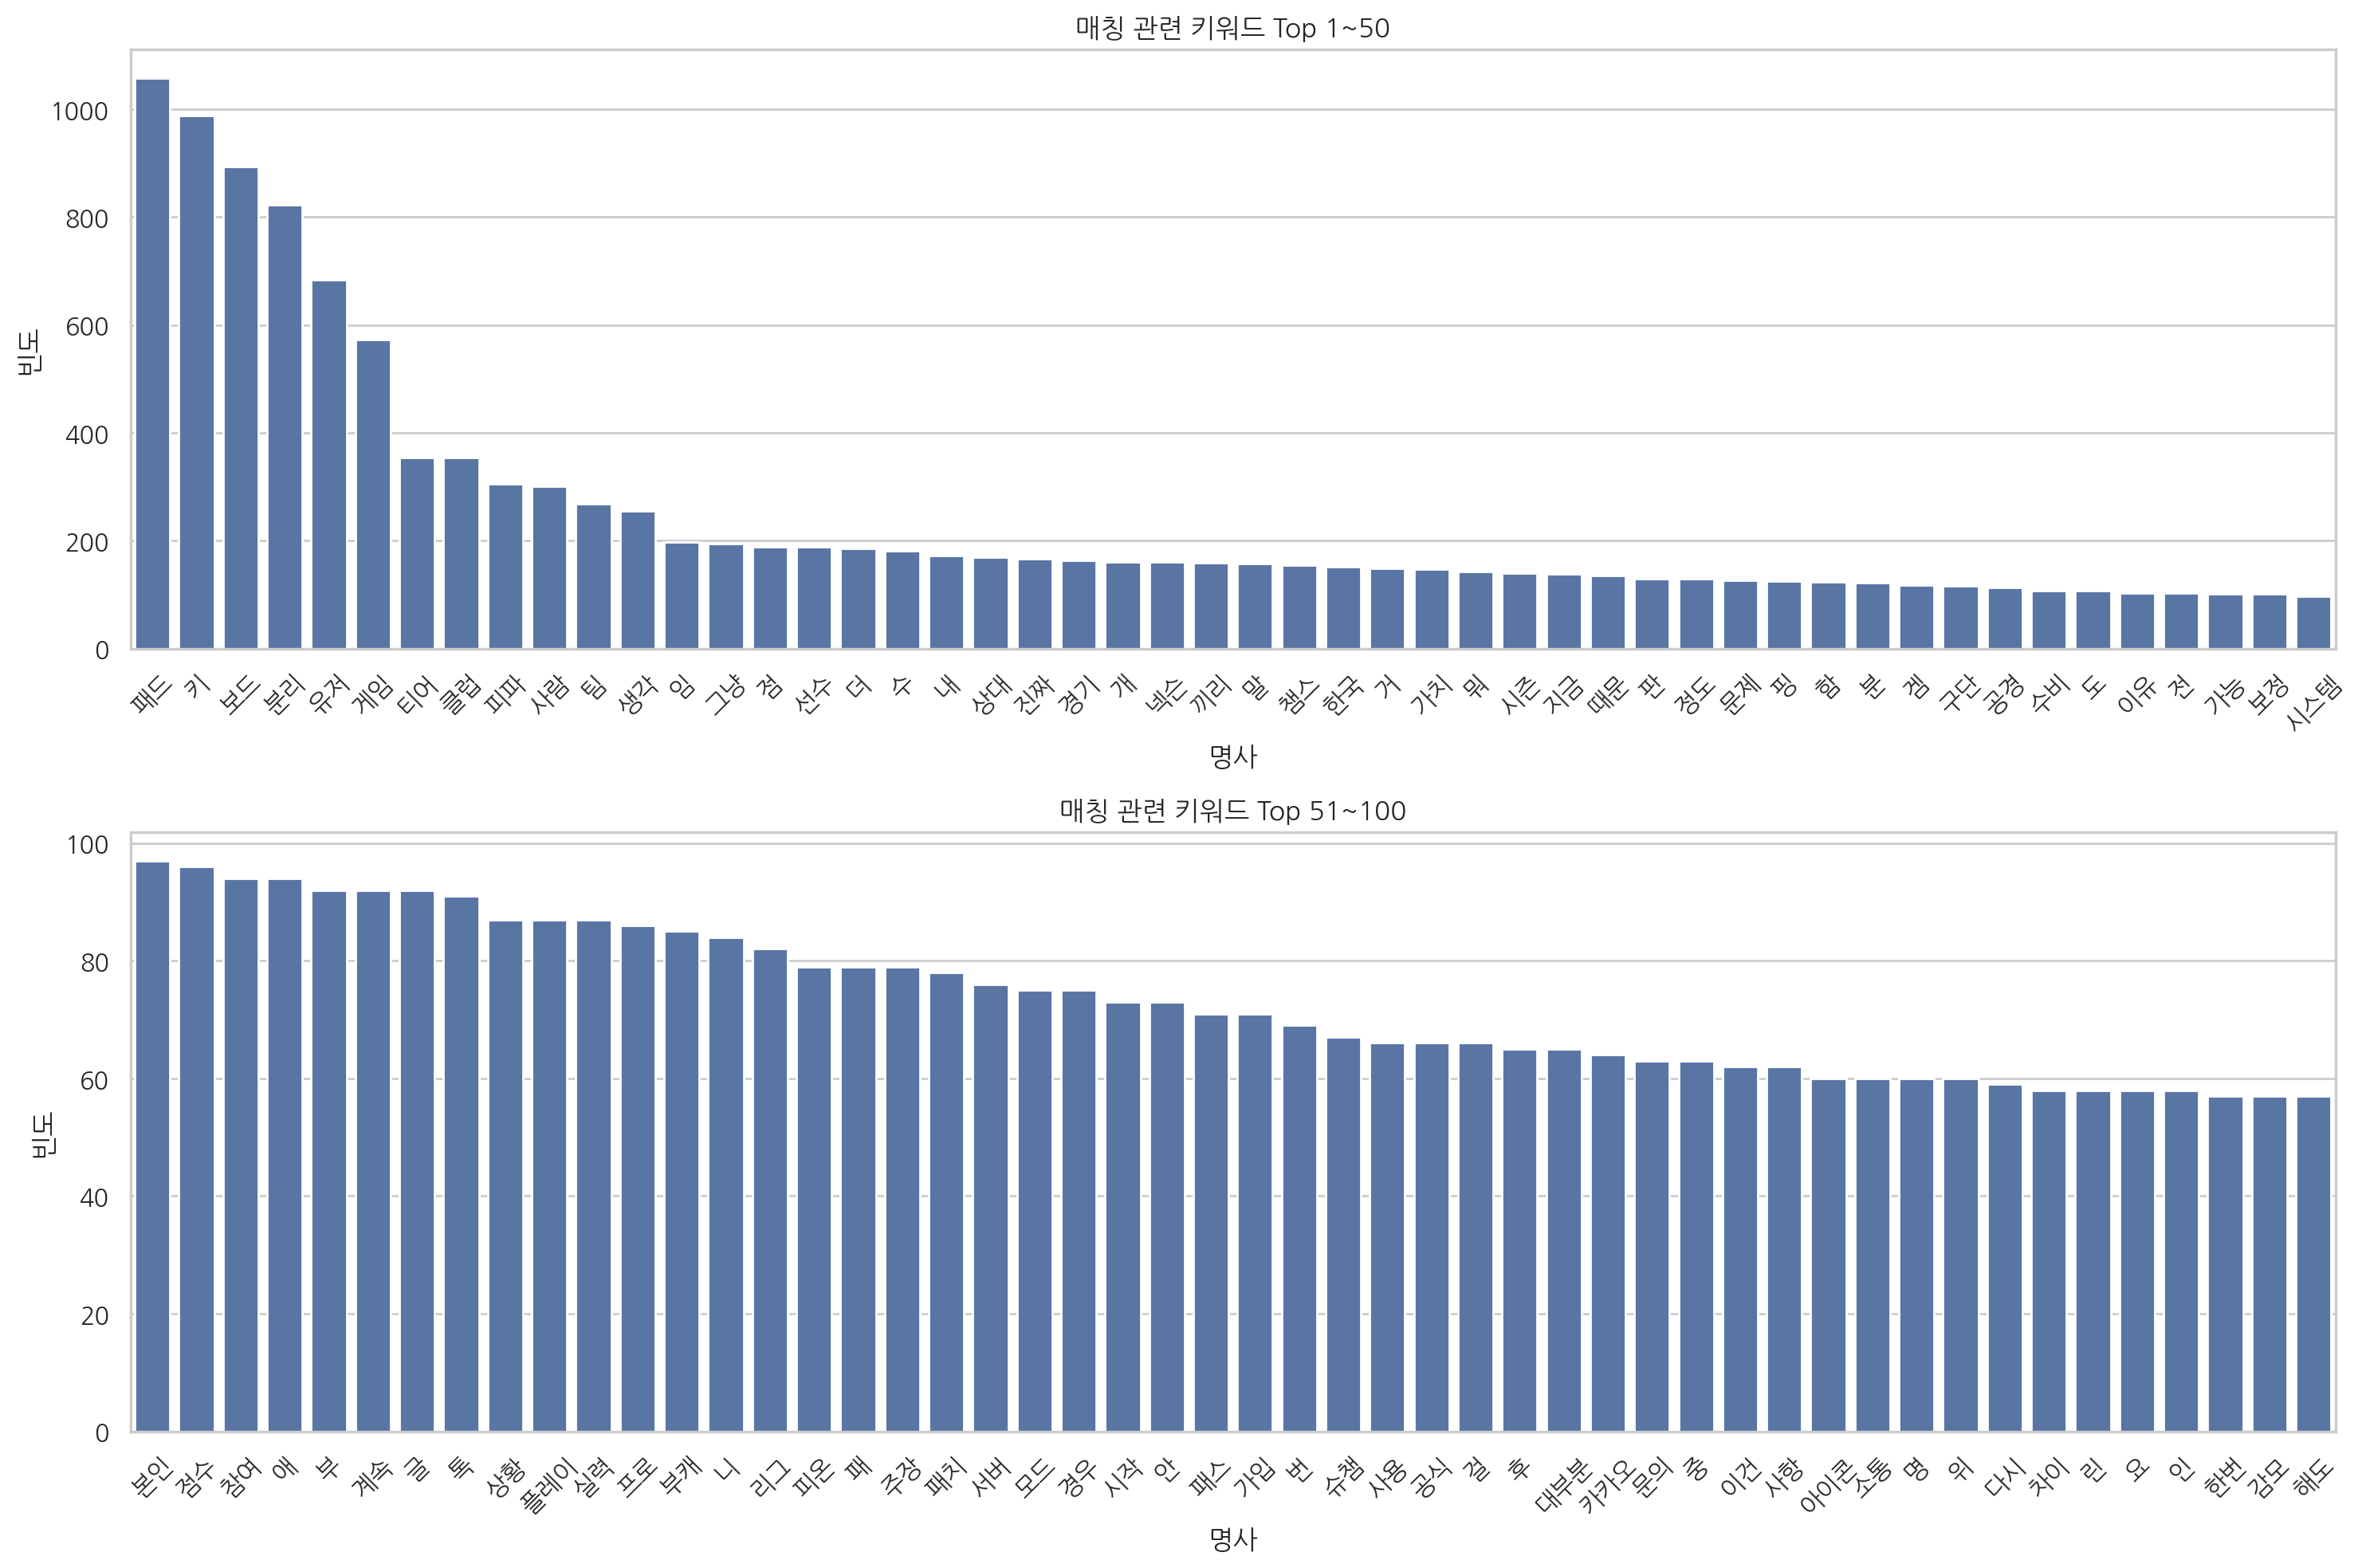

In [153]:
# 빈도 수 Top 0~100 단어 bar plot
plt.figure(figsize=(15,10))

# Top 1~50
df_pos_top50 = df_pos_count.iloc[:50]
plt.subplot(211)
sns.barplot(x=df_pos_top50['명사'],y=df_pos_top50['빈도'])
plt.title('매칭 관련 키워드 Top 1~50')
plt.xticks(rotation=45)

# Top 51~100
df_pos_top100 = df_pos_count.iloc[50:100]
plt.subplot(212)
sns.barplot(x=df_pos_top100['명사'],y=df_pos_top100['빈도'])
plt.title('매칭 관련 키워드 Top 51~100')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show();

# 시사점(가설)

대부분 인벤에 글을 쓰는 사람들은 불만을 가지고 쓰기 때문에 이 키워드들은 대부분 매칭에 대해 개선이 필요한 점이라고 생각한다.
생각, 임, 그냥과 같이 무의미한 단어들을 제외하고 TOP 100 키워드를 살펴보자.

1. [패드], [키보드], [분리]
    - 다른 키워드에 비해 눈에 띄는 차이를 보인다.
    - 이는 패드 유저, 키보드 유저 간의 플레이 방식에 따라 차이가 나기에 분리해서 매칭을 진행해야한다는 뜻으로 판단된다.
2. [한국]
    - 가성비가 좋아서 많은 유저들이 사용하는 한국 팀케미를 의미하는 것으로 판단된다.
    - 반복되는 한국팀과의 매칭이 지겹고 이른바 코다리(코리아 + 아다리)와 같은 게임 상 이슈가 많이 발생해 매칭과 관련된 키워드로 부상한 것으로 판단된다.
3. [가치], [구단]
    - 구단의 선수 가치를 나타내는 구단 가치에서 파생된 키워드이다.
    - 구단 가치가 높을수록 좋은 성능의 팀이기에 비슷한 구단 가치의 팀 매칭에 대한 니즈가 있는 것으로 판단된다.
4. [핑], [보정]
    - [핑]은 네트워크 딜레이와 관련된 키워드로 핑 차이가 크게 나면 게임 내 렉이나 튕김이 발생하기에 매칭에 핑을 맞춰야한다는 니즈로 판단된다.
    - [보정]은 연승, 연패 팀이나 성능이 크게 차이나는 팀을 만날 경우 낮은 쪽의 성능을 높여 승률을 조정한다는 게이머들간의 낭설이다.
    - 하지만 그만큼 많은 게이머들이 매칭 시 보정으로 인한 손해를 보고 있다고 생각하는 것으로 판단된다.
5. [프로],[슈챔],[차이]
    - 프로나 슈챔은 개인 티어를 말한다. 매칭과 티어가 연관된다는 것은 매칭에서 수준 차이가 많이 나는 게이머를 만난다는 불만이 있는 것으로 판단된다.
6. [공식],[감모]
    - pvp 콘텐츠인 공식 경기와 감독 모드를 말한다. 일반 공식 경기나 감독 모드의 매칭에서 모두 니즈가 있는 것으로 판단된다.

개선점
1. 패드와 키보드를 분리해서 매칭을 잡아야한다는 게이머들의 의견이 있다. 하지만 게임 방식의 차이로 매칭을 잡고 티어를 나누는 것은<br>
   게임 내 주요 재화인 선수에 대한 반향도 패드와 키보드로 나뉘어 게임 내 경제에 큰 혼란을 야기할 수 있다.<br>
   따라서 아예 별개의 매칭 보다는 패드-키보드 간의 승률을 매칭의 기준으로 잡는 것도 하나의 방법이다.
2. 핑은 대규모 온라인 라이브 게임에서 불가결하게 존재한다. 하지만 핑을 절대적으로 떨어트릴 수 없다면 유저들도 핑이 있다는 것을 체감하지 못할만큼 비슷한 핑의 상대를 매칭하는 것도 방법이다.
3. 티어는 게임 내 경쟁시스템에 가장 중요한 요소이며 게이머들이 지대한 관심을 갖는 제 1 지표기에 그 영향이 크게 도드라진다.
   따라서 매칭에서 동등한 티어를 만날 확률을 높인다면 다른 것들에 비해 큰 효과를 불러올 수 있다.

# Wordcloud

In [154]:
# 가장 많이 나온 단어 100개 저장
keyword_top100 = counter.most_common(100)

# wordcloud 생성
wc = WordCloud(font_path='C:/Users/mypc/Documents/study/project/FConline_matching_search_inven/나눔 글꼴/NanumGothic.ttf',background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(keyword_top100))

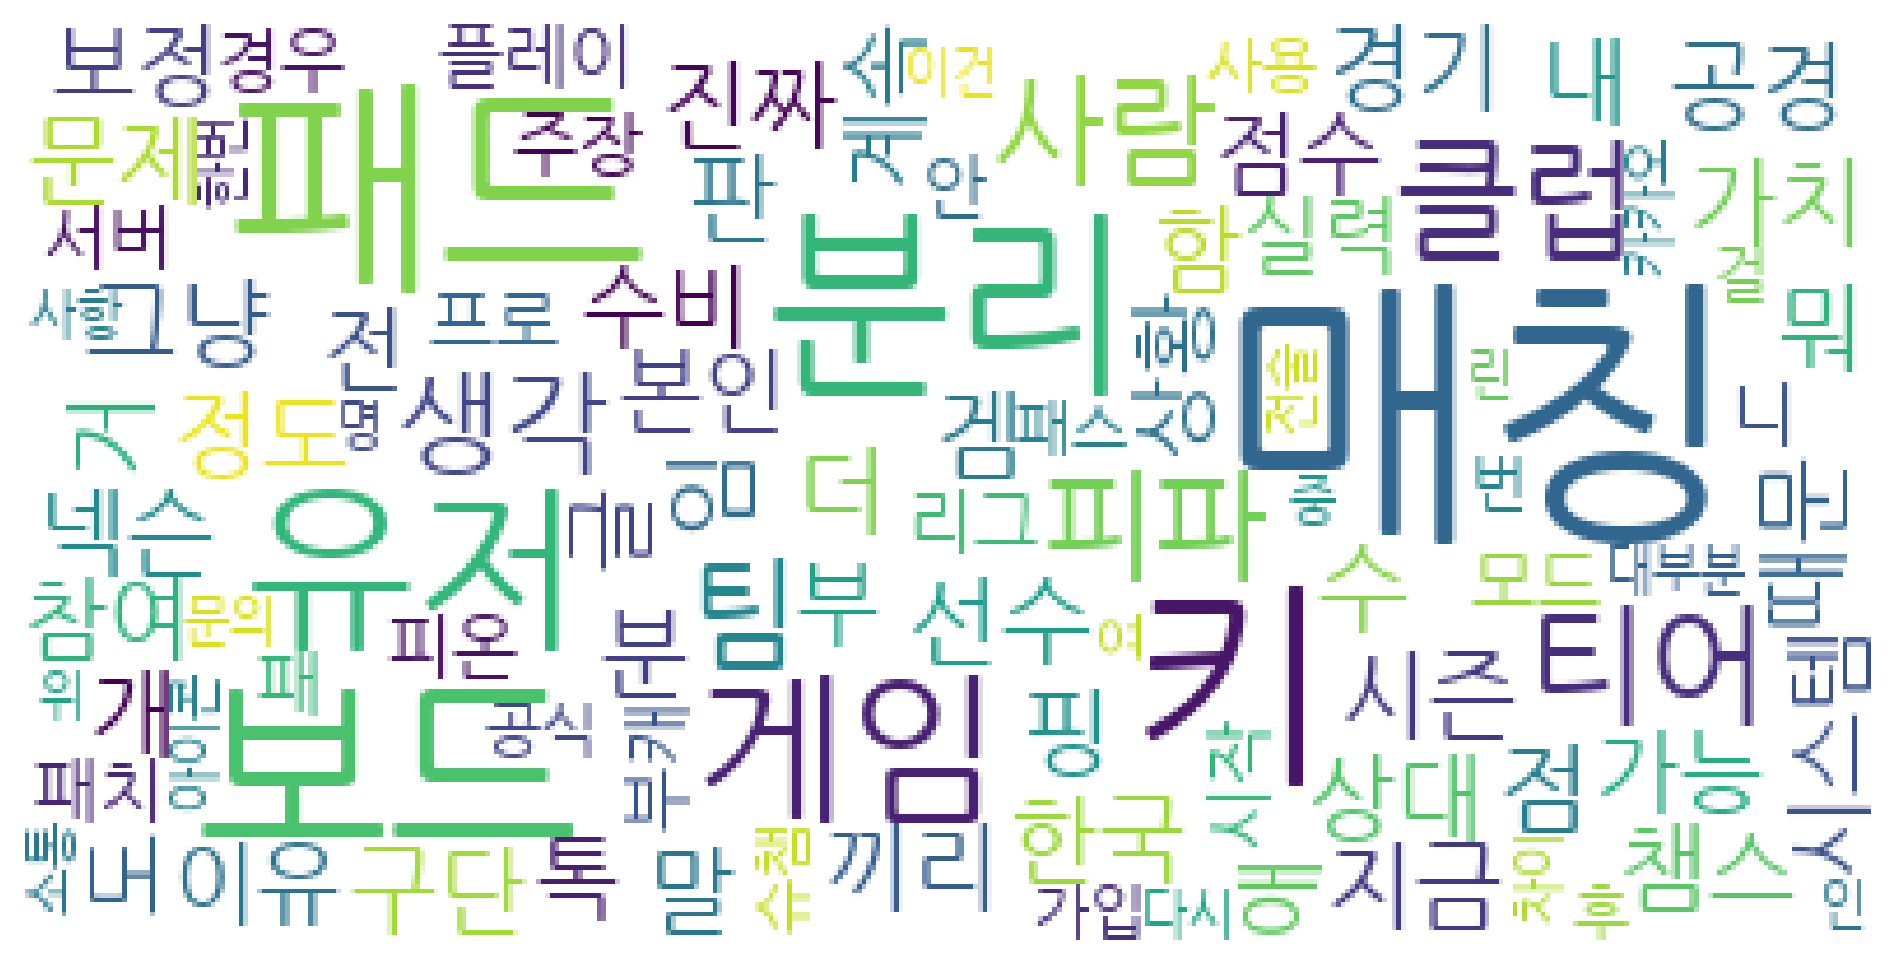

In [127]:
# wordcloud 확인
plt.figure(figsize=(12, 10))
plt.axis('off')
plt.imshow(cloud);